Override locale.getpreferredencoding to Always Use UTF-8

In [1]:
import locale

def getpreferredencoding(do_setlocale=True):
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding

Install Required Python Libraries

In [2]:
# !pip install torch
# !pip install opencv-python
# !pip install ultralytics
# !pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 51.7 MB/s eta 0:00:00


Importing the required libraries

In [3]:
import zipfile
import os
import shutil
from ultralytics import YOLO
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
import torchvision
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import seaborn as sns
from torchvision import transforms
from torchvision import datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch import flatten
import torch.optim as optim
import time
import torchvision.transforms as transforms
from PIL import Image
from IPython.display import display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Check and Print the Device CUDA/CPU

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device used: {torch.cuda.get_device_name(0) if device == 'cuda' else 'Device unavailable'}")

Device used: Tesla T4


Extract Dataset from ZIP File to Specified Directory

In [ ]:
dataset_path = '/content/Updated-Dataset.zip'
with zipfile.ZipFile(dataset_path, 'r') as zip_file:
     zip_file.extractall('/content/datasets')

Move Subfolders from Source to Destination Directory if Not Already Present

In [5]:
src_folder = '/content/datasets/Real_world_traffic-signs'
dest_folder = '/content/datasets'

for sub_folder in os.listdir(src_folder):
    source = os.path.join(src_folder, sub_folder)
    dest = os.path.join(dest_folder, sub_folder)

    if os.path.isdir(source):
        if os.path.exists(dest):
            print(f"Destination path '{dest}' already exists. Skipping '{sub_folder}'.")
        else:
            shutil.move(source, dest)


Train YOLO Model with Custom Configuration

In [6]:
yolo_model = YOLO('yolo11s.pt')
results = yolo_model.train(data='data.yaml', epochs=15, imgsz=640, batch=16)

100%|██████████| 18.4M/18.4M [00:00<00:00, 453MB/s]


Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

100%|██████████| 755k/755k [00:00<00:00, 115MB/s]


Overriding model.yaml nc=80 with nc=55

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 373MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 1369 images, 55 backgrounds, 0 corrupt: 100%|██████████| 1369/1369 [00:00<00:00, 1430.13it/s]


train: New cache created: /content/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/val/labels... 293 images, 17 backgrounds, 0 corrupt: 100%|██████████| 293/293 [00:00<00:00, 1308.56it/s]

val: New cache created: /content/datasets/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000169, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      4.44G     0.7923      6.429     0.9859         16        640: 100%|██████████| 86/86 [00:46<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.99it/s]

                   all        293        526      0.396      0.155       0.11     0.0946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      4.42G     0.7148      3.165     0.9382         26        640: 100%|██████████| 86/86 [00:34<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]


                   all        293        526      0.391      0.368      0.304      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      4.43G     0.7144      2.366     0.9333         20        640: 100%|██████████| 86/86 [00:32<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.34it/s]


                   all        293        526      0.544       0.44      0.431       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      4.45G     0.7081      1.874     0.9302         21        640: 100%|██████████| 86/86 [00:31<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.18it/s]


                   all        293        526      0.573      0.506      0.513      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      4.41G     0.6919      1.611     0.9305         35        640: 100%|██████████| 86/86 [00:34<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]

                   all        293        526      0.636      0.517      0.561      0.478


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      4.43G     0.6434      1.429     0.9044         19        640: 100%|██████████| 86/86 [00:31<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]

                   all        293        526      0.698      0.533      0.609      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      4.42G     0.6344      1.251     0.9039         15        640: 100%|██████████| 86/86 [00:29<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.11it/s]

                   all        293        526      0.677      0.612      0.662      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      4.43G     0.6136      1.108     0.8952         15        640: 100%|██████████| 86/86 [00:29<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


                   all        293        526      0.641      0.679      0.701      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15       4.4G     0.6104     0.9634     0.8883         13        640: 100%|██████████| 86/86 [00:29<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]


                   all        293        526      0.647      0.709      0.753      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      4.43G     0.5982     0.8934      0.882         21        640: 100%|██████████| 86/86 [00:32<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]


                   all        293        526      0.689      0.704      0.767       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      4.42G     0.5923     0.8171     0.8771         19        640: 100%|██████████| 86/86 [00:30<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]

                   all        293        526      0.692      0.775      0.791      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      4.44G     0.5775     0.7735      0.882         12        640: 100%|██████████| 86/86 [00:29<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.20it/s]

                   all        293        526      0.685      0.795      0.796      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      4.42G     0.5766     0.7175     0.8744         12        640: 100%|██████████| 86/86 [00:30<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]


                   all        293        526      0.742      0.769      0.797      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      4.44G     0.5615     0.6706     0.8728         15        640: 100%|██████████| 86/86 [00:31<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.21it/s]


                   all        293        526      0.827      0.725      0.803      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      4.41G     0.5554     0.6464     0.8678         19        640: 100%|██████████| 86/86 [00:30<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.93it/s]


                   all        293        526      0.796      0.746      0.794      0.696

15 epochs completed in 0.160 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,434,085 parameters, 0 gradients, 21.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]


                   all        293        526      0.827      0.725      0.803      0.703
            forb_ahead         16         16          1      0.859      0.971      0.855
             forb_left         17         18          1      0.968      0.995      0.801
         forb_overtake          9          9      0.864      0.889      0.955      0.874
            forb_right         12         12       0.96          1      0.995      0.873
    forb_speed_over_10          4          4      0.727       0.25      0.585      0.552
   forb_speed_over_100          4          6      0.654          1      0.898      0.773
   forb_speed_over_130          6          6      0.583      0.333      0.449      0.408
    forb_speed_over_30         20         21      0.828      0.689      0.812      0.698
    forb_speed_over_40          4          4          1      0.708      0.995      0.895
     forb_speed_over_5          1          1      0.911          1      0.995      0.995
    forb_speed_over_5

Save YOLO Model Weights to a File

In [7]:
MODEL_WEIGHTS_PATH = "/content/runs/detect/train/weights/last.pt"
SAVED_MODEL_PATH = "yolo_model.pth"

yolo_model = YOLO(MODEL_WEIGHTS_PATH)

torch.save(yolo_model.state_dict(), SAVED_MODEL_PATH)

Calculate Intersection over Union (IoU) and Find Best Matching Bounding Boxes

In [8]:
def calculate_intersection_over_union(predicted_bbox, actual_bbox):
    intersection_x1 = torch.max(predicted_bbox[0], actual_bbox[0])
    intersection_x2 = torch.min(predicted_bbox[0] + predicted_bbox[2], actual_bbox[0] + actual_bbox[2])
    intersection_y1 = torch.max(predicted_bbox[1], actual_bbox[1])
    intersection_y2 = torch.min(predicted_bbox[1] + predicted_bbox[3], actual_bbox[1] + actual_bbox[3])

    intersection_width = torch.clamp(intersection_x2 - intersection_x1, min=0)
    intersection_height = torch.clamp(intersection_y2 - intersection_y1, min=0)

    intersection_area = intersection_width * intersection_height
    predicted_area = predicted_bbox[2] * predicted_bbox[3]
    actual_area = actual_bbox[2] * actual_bbox[3]
    union_area = predicted_area + actual_area - intersection_area

    iou = intersection_area / union_area
    return iou


def find_best_matching_bounding_boxes(predicted_bboxes, actual_bboxes):
    best_match_indices = None
    max_iou_value = 0

    predicted_idx = 0
    while predicted_idx < len(predicted_bboxes):
        actual_idx = 0

        while actual_idx < len(actual_bboxes):
            current_iou = calculate_intersection_over_union(predicted_bboxes[predicted_idx], actual_bboxes[actual_idx])

            if current_iou > max_iou_value:
                best_match_indices = (predicted_idx, actual_idx)
                max_iou_value = current_iou

            actual_idx += 1
        predicted_idx += 1

    return best_match_indices, max_iou_value


Map Predicted and Actual Bounding Boxes, Then Compute Loss and Accuracy

In [9]:
def map_and_compute_loss_and_accuracy(predicted_boxes, actual_boxes, actual_class_values):

    best_bbox_match_loss = []
    best_bbox_match_accuracy = []
    best_bbox_match_pred = []
    best_bbox_match_actual = []
    mapped_actual_classes = []

    predicted_boxes = predicted_boxes.cpu()
    actual_boxes = actual_boxes.cpu()

    min_count = min(predicted_boxes.size(0),actual_boxes.size(0))

    for i in range(min_count):

        best_bbox_match_idx, maximum_iou = find_best_matching_bounding_boxes(predicted_boxes,actual_boxes)

        if best_bbox_match_idx is None:
           break

        else:

            predicted_box = predicted_boxes[best_bbox_match_idx[0]]
            actual_box = actual_boxes[best_bbox_match_idx[1]]

            loss = F.smooth_l1_loss(predicted_box, actual_box, reduction='sum')
            best_bbox_match_loss.append(loss.item())

            accuracy = maximum_iou.item()
            best_bbox_match_accuracy.append(accuracy)

            best_bbox_match_pred.append(predicted_box)
            best_bbox_match_actual.append(actual_box)

            if len(actual_class_values) > 0:
                mapped_actual_classes.append(actual_class_values[best_bbox_match_idx[1]])

            predicted_boxes = torch.cat((predicted_boxes[:best_bbox_match_idx[0]],predicted_boxes[best_bbox_match_idx[0] + 1:]), dim=0)
            actual_boxes = torch.cat((actual_boxes[:best_bbox_match_idx[1]],actual_boxes[best_bbox_match_idx[1] + 1:]), dim=0)

            if len(actual_class_values) > 0:
                del actual_class_values[best_bbox_match_idx[1]]

    return best_bbox_match_loss, best_bbox_match_accuracy, best_bbox_match_pred, best_bbox_match_actual, mapped_actual_classes

Parse YOLO Annotation File to Extract Bounding Boxes and Class Labels

In [10]:
def parse_yolo_annotation(annotation_path):
    bboxes = []
    classes = []

    with open(annotation_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        values = line.strip().split()

        class_label = int(values[0])
        bboxes_coordinates = [float(values[1]), float(values[2]), float(values[3]), float(values[4])]

        classes.append(class_label)
        bboxes.append(bboxes_coordinates)

    return bboxes, classes


Evaluate YOLO Model Predictions Against Ground Truth for Loss and Accuracy

In [11]:
index = 0
image_file_paths = []
predicted_bboxes_list = []
predicted_class_labels_list = []
ground_truth_bboxes_list = []
ground_truth_class_labels_list = []

predicted_bboxes_final = []
ground_truth_bboxes_final = []
ground_truth_class_labels_final = []
bbox_losses_final = []
bbox_accuracies_final = []

test_image_directory = '/content/datasets/test/images'
test_annotation_directory = '/content/datasets/test/labels'

image_filenames = sorted(os.listdir(test_image_directory))
annotation_filenames = sorted(os.listdir(test_annotation_directory))

image_file_paths = [os.path.join(test_image_directory, img) for img in image_filenames]
annotation_file_paths = [os.path.join(test_annotation_directory, ann) for ann in annotation_filenames]

while index < len(image_file_paths):

    current_image_path = image_file_paths[index]
    current_annotation_path = annotation_file_paths[index]

    image_data = cv2.imread(current_image_path)

    ground_truth_bboxes, ground_truth_classes = parse_yolo_annotation(current_annotation_path)

    prediction_results = yolo_model.predict(current_image_path, imgsz=640, conf=0.5, save=True)

    predicted_bboxes_list.extend([result.boxes.xywhn for result in prediction_results])

    ground_truth_bboxes_list.append(torch.tensor(ground_truth_bboxes))

    ground_truth_class_labels_list.append(ground_truth_classes)

    actual_bboxes = ground_truth_bboxes_list[index]
    predicted_bboxes = predicted_bboxes_list[index]

    bbox_loss, bbox_accuracy, matched_predicted_bboxes, matched_ground_truth_bboxes, mapped_class_labels = map_and_compute_loss_and_accuracy(
        predicted_bboxes, actual_bboxes, ground_truth_class_labels_list[index]
    )

    predicted_bboxes_final.append(matched_predicted_bboxes)
    ground_truth_bboxes_final.append(matched_ground_truth_bboxes)
    ground_truth_class_labels_final.append(mapped_class_labels)
    bbox_accuracies_final.append(bbox_accuracy)
    bbox_losses_final.append(bbox_loss)

    index += 1

final_predicted_bboxes = predicted_bboxes_final
final_ground_truth_bboxes = ground_truth_bboxes_final
final_ground_truth_class_labels = ground_truth_class_labels_final
final_bounding_box_losses = bbox_losses_final
final_bounding_box_accuracies = bbox_accuracies_final



image 1/1 /content/datasets/test/images/AUTO_COLLECTED_PICTURE_102_png.rf.d41ec30b5e991c5d4d9e9644c5698a05.jpg: 640x640 1 info_parking, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/datasets/test/images/AUTO_COLLECTED_PICTURE_135_png.rf.06465ab107bf20158a53f1ee84888846.jpg: 640x640 1 info_crosswalk, 1 info_parking, 15.9ms
Speed: 2.2ms preprocess, 15.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/datasets/test/images/AUTO_COLLECTED_PICTURE_159_png.rf.955fc653a5ceb9f69ef526305e087aa6.jpg: 640x640 1 forb_stopping, 18.6ms
Speed: 2.5ms preprocess, 18.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict

image 1/1 /content/datasets/test/images/AUTO_COLLECTED_PICTURE_164_png.rf.e23b26f9179e6c55042b8042c7859c0e.jpg: 640x640 1 forb_ahead, 1 info_parki

Visualize Average Bounding Box Accuracy and Loss with Bar Charts

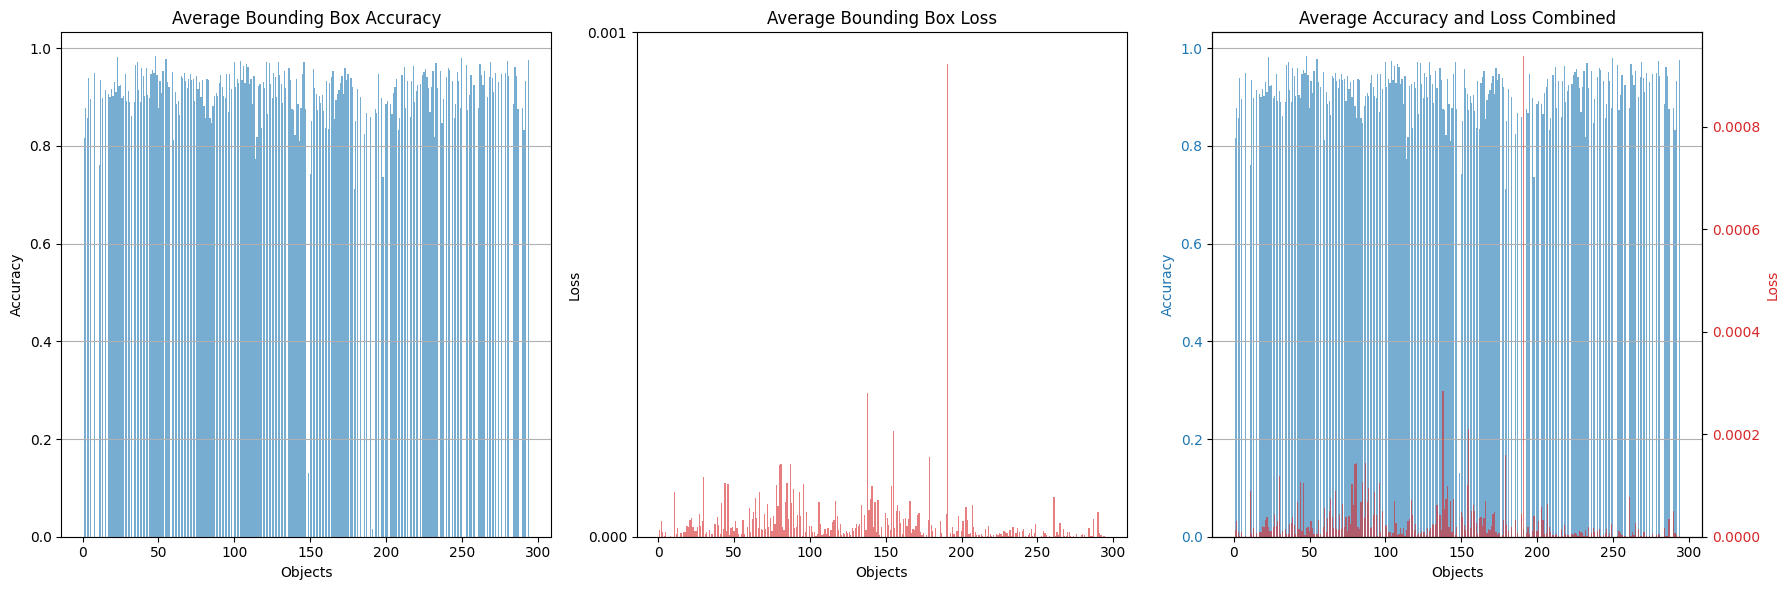

In [13]:
average_obj_accuracies = [np.mean(obj_acc) if obj_acc else np.nan for obj_acc in bbox_accuracies_final]
average_obj_losses = [np.mean(obj_loss) if obj_loss else np.nan for obj_loss in bbox_losses_final]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(range(1, len(average_obj_accuracies) + 1), average_obj_accuracies, color='tab:blue', alpha=0.6)
axes[0].set_title("Average Bounding Box Accuracy")
axes[0].set_xlabel("Objects")
axes[0].set_ylabel("Accuracy")
axes[0].grid(axis='y')

axes[1].bar(range(1, len(average_obj_losses) + 1), average_obj_losses, color='tab:red', alpha=0.6)
axes[1].set_title("Average Bounding Box Loss")
axes[1].set_xlabel("Objects")
axes[1].set_ylabel("Loss")

axes[1].set_yticks(np.arange(0, max(average_obj_losses) + 0.001, 0.001))
axes[1].grid(axis='y')

ax2 = axes[2]
ax1 = ax2.twinx()

ax2.bar(range(1, len(average_obj_accuracies) + 1), average_obj_accuracies, color='tab:blue', alpha=0.6, label="Accuracy")
ax2.set_xlabel("Objects")
ax2.set_ylabel("Accuracy", color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax1.bar(range(1, len(average_obj_losses) + 1), average_obj_losses, color='tab:red', alpha=0.6, label="Loss")
ax1.set_ylabel("Loss", color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2.set_title("Average Accuracy and Loss Combined")
ax2.grid(axis='y')

plt.tight_layout()
plt.show()

Crop and Save Detected Objects from Images Using YOLO Bounding Boxes

In [14]:
CROPPED_IMAGES_FOLDER = "/content/cropped_images_after_yolo"
IMAGE_EXTENSION = ".jpg"
OBJECT_KEY = "object"
BBOX_KEYS = ["x", "y", "w", "h"]

if not os.path.exists(CROPPED_IMAGES_FOLDER):
    os.makedirs(CROPPED_IMAGES_FOLDER)

cropped_images = []

for image_idx, (image_path, bboxes) in enumerate(zip(image_file_paths, predicted_bboxes_final)):
    image = cv2.imread(image_path)
    image_name, _ = os.path.splitext(os.path.basename(image_path))

    bbox_idx = 0
    while bbox_idx < len(bboxes):
        bbox = bboxes[bbox_idx]

        x, y, w, h = map(float, bbox.tolist())
        x1, y1 = int((x - w / 2) * image.shape[1]), int((y - h / 2) * image.shape[0])
        x2, y2 = int((x + w / 2) * image.shape[1]), int((y + h / 2) * image.shape[0])

        roi = image[y1:y2, x1:x2]

        if roi.size != 0:
            output_path = os.path.join(CROPPED_IMAGES_FOLDER, f"{image_name}_{OBJECT_KEY}_{bbox_idx}{IMAGE_EXTENSION}")
            cropped_images.append(output_path)

            cv2.imwrite(output_path, roi)

        bbox_idx += 1


Define Image Transformation Pipeline with Resizing, Normalization, and Gaussian Blur

In [15]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((40,40)),
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0))
])

Convert Cropped Images to Tensors with Transformations Applied

In [16]:
cropped_image_tensors = []

image_idx = 0
while image_idx < len(cropped_images):
    img_path = cropped_images[image_idx]
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_tensor = transform(img_rgb)

    cropped_image_tensors.append(img_tensor)
    image_idx += 1

cropped_image_tensors = [
    transform(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    for img_path in cropped_images
]

print("Each image is of shape:", cropped_image_tensors[0].shape)


Each image is of shape: torch.Size([3, 40, 40])


# **Vision Transformer X Resnet Concatenator Model**

In [20]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        out = self.relu(out)
        return out

class ResNet34(nn.Module):
    def __init__(self, num_classes=169):
        super(ResNet34, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
        self.block2 = self._make_layer(64, 64, 3)
        self.block3 = self._make_layer(64, 128, 4, stride=2)
        self.block4 = self._make_layer(128, 256, 6, stride=2)
        self.block5 = self._make_layer(256, 512, 3, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, in_channels, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride, downsample))
        for _ in range(1, blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.block5(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

class VisionTransformer_Model(nn.Module):
    def __init__(self, in_channels, img_size, embedding_dim, num_attention_heads, patch_size, num_layers):
        super(VisionTransformer_Model, self).__init__()
        self.patch_embedding = nn.Sequential(
            nn.Conv2d(in_channels, embedding_dim, kernel_size=patch_size, stride=patch_size),
            nn.BatchNorm2d(embedding_dim),
            nn.Flatten(2)
        )
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embedding_dim, nhead=num_attention_heads), num_layers=num_layers
        )

    def forward(self, x):
        x = self.patch_embedding(x)
        x = self.encoder(x)
        x = x.mean(dim=1)
        return x

class VisionTransformer_ResNet_Concatenator(nn.Module):
    def __init__(self, vision_model, resnet_model, conv1d_out_channels, num_classes):
        super(VisionTransformer_ResNet_Concatenator, self).__init__()
        self.vision_model = vision_model
        self.resnet_model = resnet_model
        self.conv1d_out_channels = conv1d_out_channels
        with torch.no_grad():
            resnet_output_dim = resnet_model(torch.zeros(1, 3, 40, 40).to(device)).shape[1]
            vit_output_dim = vision_model(torch.zeros(1, 3, 40, 40).to(device)).shape[1]
        self.concat_dim = vit_output_dim + resnet_output_dim
        self.conv1d = nn.Conv1d(self.concat_dim, conv1d_out_channels, kernel_size=1)
        self.fc = nn.Linear(conv1d_out_channels, num_classes)

    def forward(self, x):
        vit_output = self.vision_model(x)
        resnet_output = self.resnet_model(x)
        concatenated_output = torch.cat((vit_output, resnet_output), dim=1)
        concatenated_output = concatenated_output.unsqueeze(2)
        concatenated_output = concatenated_output.permute(0, 1, 2)
        conv1d_output = self.conv1d(concatenated_output)
        conv1d_output = conv1d_output.squeeze(2)
        output = self.fc(conv1d_output)
        return output

def initialize_models(device):
    resnet_model_con = ResNet34().to(device)
    in_channels, img_size, embedding_dim_vision = 3, 40, 13 * 13
    num_attention_heads, patch_size, num_layers = 13, 3, 12
    vit_model_con = VisionTransformer_Model(in_channels, img_size, embedding_dim_vision, num_attention_heads, patch_size, num_layers).to(device)
    return resnet_model_con, vit_model_con

resnet_model_con, vit_model_con = initialize_models(device)
conv1d_out_channels = 128
num_classes = 55
vit_resnet_model = VisionTransformer_ResNet_Concatenator(vit_model_con, resnet_model_con, conv1d_out_channels, num_classes).to(device)
print(vit_resnet_model)


VisionTransformer_ResNet_Concatenator(
  (vision_model): VisionTransformer_Model(
    (patch_embedding): Sequential(
      (0): Conv2d(3, 169, kernel_size=(3, 3), stride=(3, 3))
      (1): BatchNorm2d(169, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Flatten(start_dim=2, end_dim=-1)
    )
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-11): 12 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=169, out_features=169, bias=True)
          )
          (linear1): Linear(in_features=169, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=169, bias=True)
          (norm1): LayerNorm((169,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((169,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (drop

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Load Pretrained Vision Transformer and ResNet Concatenated Model for Evaluation

In [21]:
vit_resnet_model = VisionTransformer_ResNet_Concatenator(vit_model_con, resnet_model_con, conv1d_out_channels, num_classes).to(device)
vit_resnet_model_path = "vit_resnet_modelyolo.pth"
vit_resnet_model.load_state_dict(torch.load(vit_resnet_model_path))
vit_resnet_model.eval()

VisionTransformer_ResNet_Concatenator(
  (vision_model): VisionTransformer_Model(
    (patch_embedding): Sequential(
      (0): Conv2d(3, 169, kernel_size=(3, 3), stride=(3, 3))
      (1): BatchNorm2d(169, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Flatten(start_dim=2, end_dim=-1)
    )
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-11): 12 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=169, out_features=169, bias=True)
          )
          (linear1): Linear(in_features=169, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=169, bias=True)
          (norm1): LayerNorm((169,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((169,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (drop

Evaluate Classification Accuracy of ViT-ResNet Model on Test Images

In [22]:
NUM_CLASSES = 55

flattened_ground_truth_classes = []
i = 0
while i < len(ground_truth_class_labels_final):
    sublist = ground_truth_class_labels_final[i]
    j = 0
    while j < len(sublist):
        flattened_ground_truth_classes.append(sublist[j])
        j += 1
    i += 1

ground_truth_classes_tensor = []
k = 0
while k < len(flattened_ground_truth_classes):
    ground_truth_classes_tensor.append(torch.tensor(flattened_ground_truth_classes[k]))
    k += 1

predictions = []

loss_criterion = nn.CrossEntropyLoss()

image_tensors_device = []
l = 0
while l < len(cropped_image_tensors):
    image_tensors_device.append(cropped_image_tensors[l].to(device))
    l += 1

img_idx = 0
while img_idx < len(image_tensors_device):
    img_tensor = image_tensors_device[img_idx]

    with torch.no_grad():
        output = vit_resnet_model(img_tensor.unsqueeze(0)).to(device)

        probabilities = nn.Softmax(dim=1)(output)

        predicted_class = probabilities.argmax(1).item()
        predictions.append(predicted_class)

    img_idx += 1

correct_pred_count = 0
prediction_idx = 0
while prediction_idx < len(predictions):
    if predictions[prediction_idx] == ground_truth_classes_tensor[prediction_idx].item():
        correct_pred_count += 1
    prediction_idx += 1

classification_accuracy = (correct_pred_count / len(predictions)) * 100

print(f'Accuracy on test images: {classification_accuracy:.2f}%')


Accuracy on test images: 98.10%


Calculate and Display Object Detection Metrics: Accuracy and Average Loss

In [23]:
def calculate_object_detection_metrics(bbox_accuracies_final, bbox_losses_final):
    final_bbox_accuracy_flat = []
    i = 0
    while i < len(bbox_accuracies_final):
        sublist = bbox_accuracies_final[i]
        j = 0
        while j < len(sublist):
            final_bbox_accuracy_flat.append(sublist[j])
            j += 1
        i += 1

    obj_det_accuracy = sum(final_bbox_accuracy_flat) / len(final_bbox_accuracy_flat) * 100

    final_bbox_loss_flat = []
    k = 0
    while k < len(bbox_losses_final):
        sublist = bbox_losses_final[k]
        l = 0
        while l < len(sublist):
            final_bbox_loss_flat.append(sublist[l])
            l += 1
        k += 1

    obj_det_loss = sum(final_bbox_loss_flat) / len(final_bbox_loss_flat)

    print(f'Accuracy of YOLOv11 model on test images: {obj_det_accuracy:.2f}%')
    print(f'Average loss of the YOLOv11 model on test images: {obj_det_loss}')

    return obj_det_accuracy

obj_det_accuracy = calculate_object_detection_metrics(bbox_accuracies_final, bbox_losses_final)


Accuracy of YOLOv11 model on test images: 90.65%
Average loss of the YOLOv11 model on test images: 5.132684392193523e-05


Calculate Final Weighted Accuracy Combining Object Detection and Classification Accuracy

In [24]:
def calculate_final_accuracy(obj_det_accuracy, class_accuracy, alpha=0.5):
    weighted_obj_det_accuracy = alpha * obj_det_accuracy
    weighted_class_accuracy = (1 - alpha) * class_accuracy

    vit_resnet_final_accuracy = weighted_obj_det_accuracy + weighted_class_accuracy

    result_accuracy = vit_resnet_final_accuracy
    print(f'Overall accuracy on test images: {result_accuracy:.2f}%')

    return result_accuracy

final_obj_det_accuracy = obj_det_accuracy
final_class_accuracy = classification_accuracy
alpha_value = 0.5

result_accuracy = calculate_final_accuracy(final_obj_det_accuracy, final_class_accuracy, alpha_value)

Overall accuracy on test images: 94.38%


Calculate and Display Performance Metrics

In [25]:
def calculate_performance_metrics(Y_test, Y_pred):
    precision, recall, f1, support = precision_recall_fscore_support(Y_test, Y_pred)

    precision_score = precision
    recall_score = recall
    f1_score = f1
    support_score = support

    print("Performance Metrics:")
    print(f"Accuracy      : {result_accuracy:.2f} %")
    print("Precision     : ", end="")
    print(precision_score)
    print("Recall        : ", end="")
    print(recall_score)
    print("F1 Score      : ", end="")
    print(f1_score)

final_Y_test = flattened_ground_truth_classes
final_Y_pred = predictions

calculate_performance_metrics(final_Y_test, final_Y_pred)

Performance Metrics:
Accuracy      : 94.38 %
Precision     : [          1           1           1           1     0.66667           1           1           1           1           1           1           1           1           1         0.4           1           1           1           1     0.97143           1           1           1           1           1           1
           1     0.93333           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           0           1           1           1        0.75           1]
Recall        : [          1           1           1           1           1           1           1           1           1           1           1           1     0.83333        0.75           1           1           1           1         0.8           1           1           1           1           1           1           1
           1       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Visualization: Confusion Matrix and Actual vs Predicted Classes

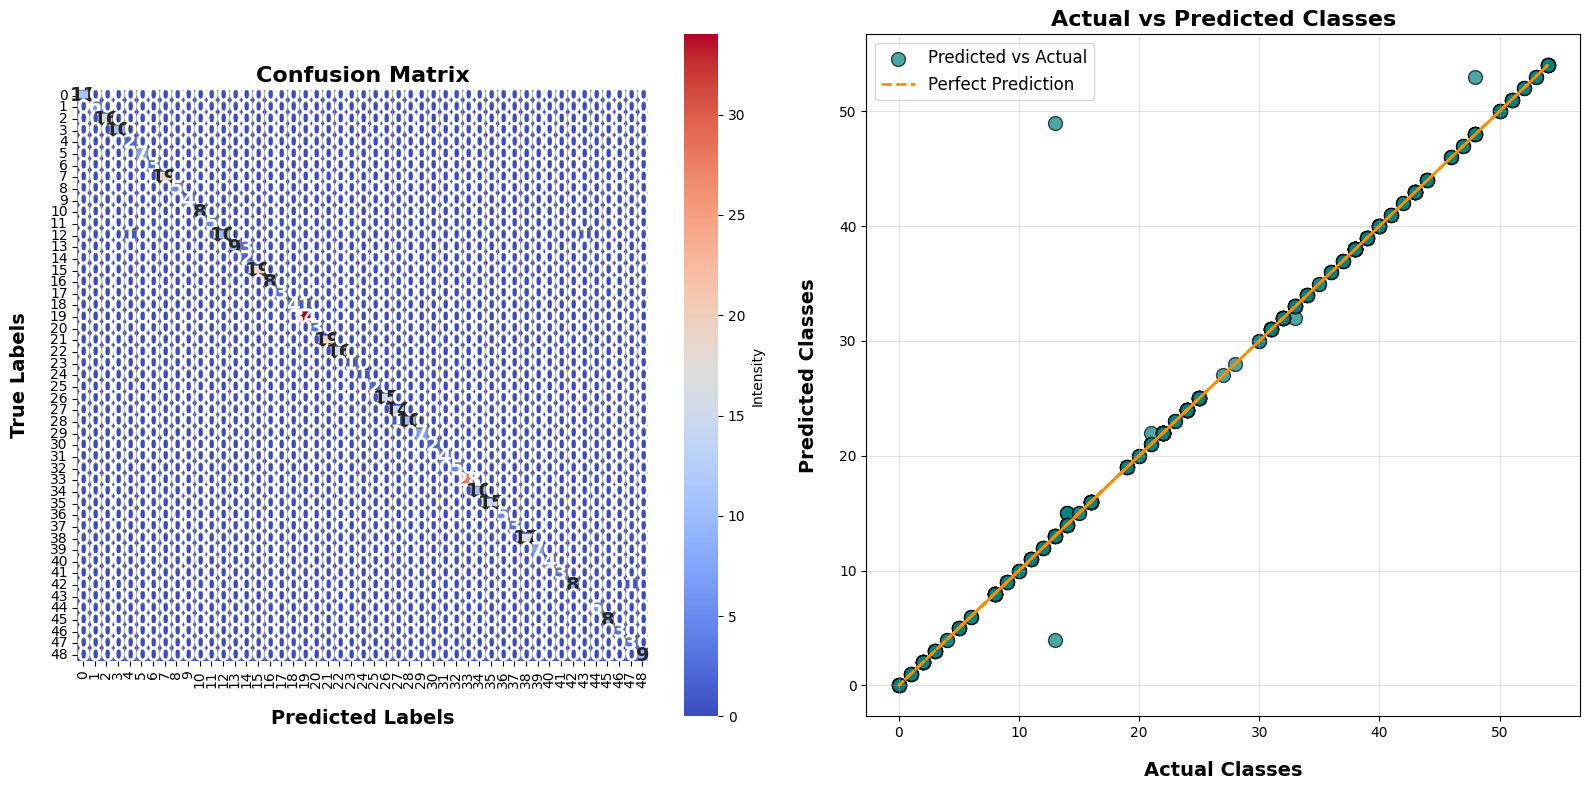

In [29]:
def plot_cmclass(final_Y_test, final_Y_pred, flattened_ground_truth_classes, predictions):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Create a figure with 2 side-by-side subplots

    # Confusion Matrix Plot
    cmat = confusion_matrix(final_Y_test, final_Y_pred)
    sns.heatmap(cmat, annot=True, fmt="d", cmap='coolwarm', cbar_kws={'label': 'Intensity'},
                linewidths=0.5, linecolor='gray', annot_kws={"size": 14, 'weight': 'bold'},
                square=True, xticklabels=True, yticklabels=True, ax=axes[0])
    axes[0].set_xlabel('Predicted Labels', fontsize=14, labelpad=15, weight='bold')
    axes[0].set_ylabel('True Labels', fontsize=14, labelpad=15, weight='bold')
    axes[0].set_title('Confusion Matrix', fontsize=16, weight='bold')

    # Actual vs Predicted Classes Plot
    axes[1].scatter(flattened_ground_truth_classes, predictions, color='teal', alpha=0.7, edgecolors='black', s=100, label='Predicted vs Actual', marker='o')
    axes[1].plot(flattened_ground_truth_classes, flattened_ground_truth_classes, color='darkorange', linestyle='--', linewidth=2, label='Perfect Prediction')
    axes[1].set_xlabel('Actual Classes', fontsize=14, labelpad=15, weight='bold')
    axes[1].set_ylabel('Predicted Classes', fontsize=14, labelpad=15, weight='bold')
    axes[1].set_title('Actual vs Predicted Classes', fontsize=16, weight='bold')
    axes[1].grid(True, linestyle='-', linewidth=0.5, alpha=0.5)
    axes[1].legend(loc='upper left', fontsize=12)

    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_cmclass(final_Y_test, final_Y_pred, flattened_ground_truth_classes, final_Y_pred)


Zip and Download the runs Folder in Google Colab's /content Directory

In [30]:
!zip -r runs_data.zip /content/runs

from google.colab import files
files.download('runs_data.zip')


  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 39%)
  adding: content/runs/detect/train/F1_curve.png (deflated 9%)
  adding: content/runs/detect/train/results.png (deflated 7%)
  adding: content/runs/detect/train/PR_curve.png (deflated 11%)
  adding: content/runs/detect/train/args.yaml (deflated 53%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 17%)
  adding: content/runs/detect/train/labels.jpg (deflated 28%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 5%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 6%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 17%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 5%)
  adding: content/runs/detect/train/results.csv (deflated 58%)
  adding: content/runs/detect/train/train_batch432.jpg (

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>